# DTEK0042 Exercise 2

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze an ECG signal step-by-step as outlined below. The deliverables for this exercise are a jupyter notebook in both .ipynb and .html format. Please provide caption for every figure and include description for every figure. 

## library Imports

In [109]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# Data Import and plotting
* Import the ECG signal named “ECG_800Hz.txt” into your python environment and store it in a variable named “ECG_sig”. 
* Plot the signal
* Note: the sampling frequency of this signal is 800Hz. 
* You need this value if you want to plot ECG versus time.


     HINT: ECG_sig = np.loadtxt(the directory of the ECG signal) 
     https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html

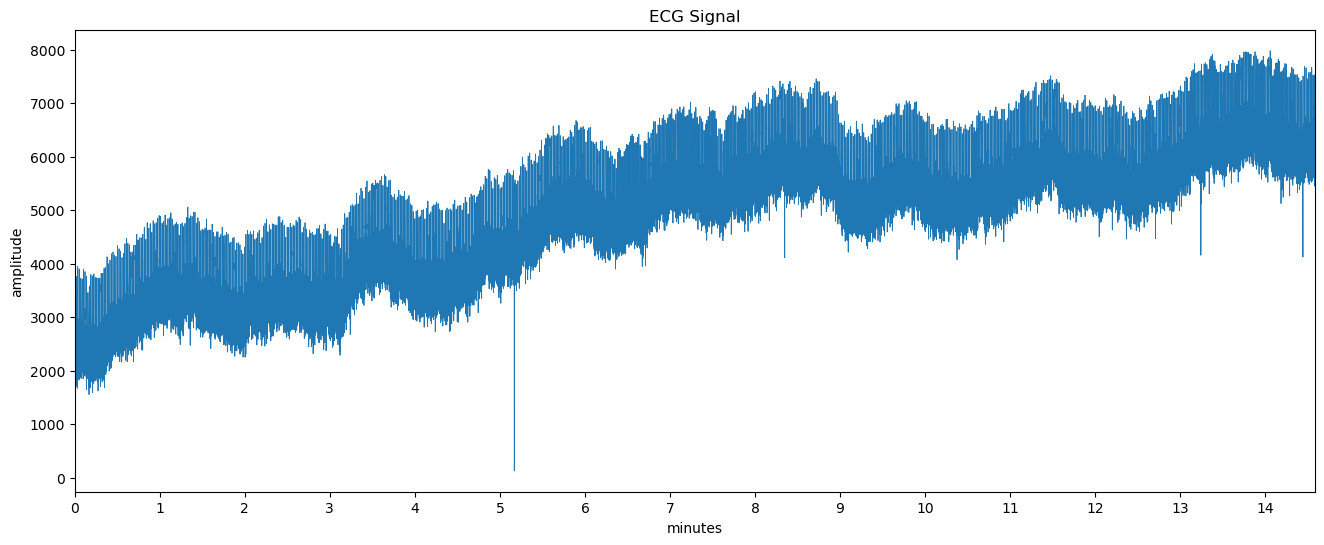

In [116]:
ECG_sig = np.loadtxt('ECG_800hz.txt')

start = 0
hz = 800
stop = len(ECG_sig) / hz / 60
time = np.linspace(0, stop, len(ECG_sig))

plt.figure(figsize=(16, 6))
plt.plot(time, ECG_sig, linewidth=.6)
plt.title("ECG Signal")
plt.xlabel("minutes")
plt.ylabel("amplitude")
plt.xticks(np.arange(0, stop + 1, step=1))
plt.xlim(left=start, right=stop)
plt.show()

# Discrete Fourier Transform

 * Compute DFT using FFT algorithm provided by scipy package. Take only the positive frequencies from the computed DFT and subsequently calculate the magnitude (absolute value) of frequency content. Plot the calculated magnitude versus frequency.
 * Discard the frequencies below 0.5Hz and above 40Hz and replot the magnitude versus frequency.
 

     * HINT use scipy.fft.rfft() outputs positive portion of function 
     
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfft.html
     https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.rfftfreq.html
     

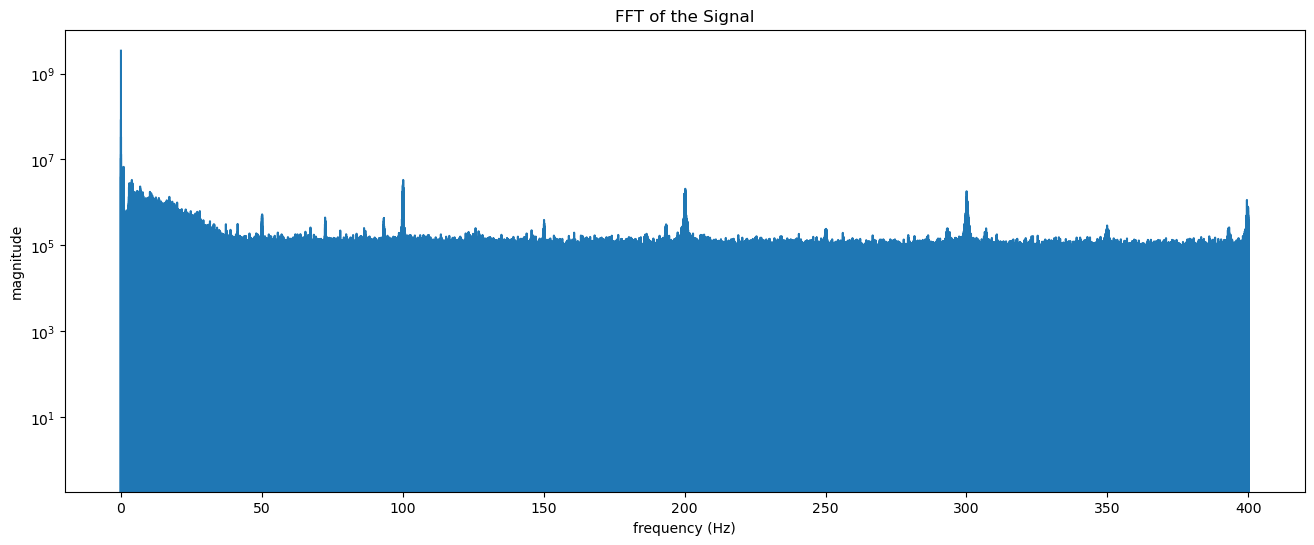

In [118]:
magnitude = sp.fft.rfft(ECG_sig)
freq = sp.fft.rfftfreq(len(ECG_sig), 1/hz)

plt.figure(figsize=(16, 6))
plt.semilogy(freq, magnitude)
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude')
plt.title('FFT of the Signal')
plt.show()

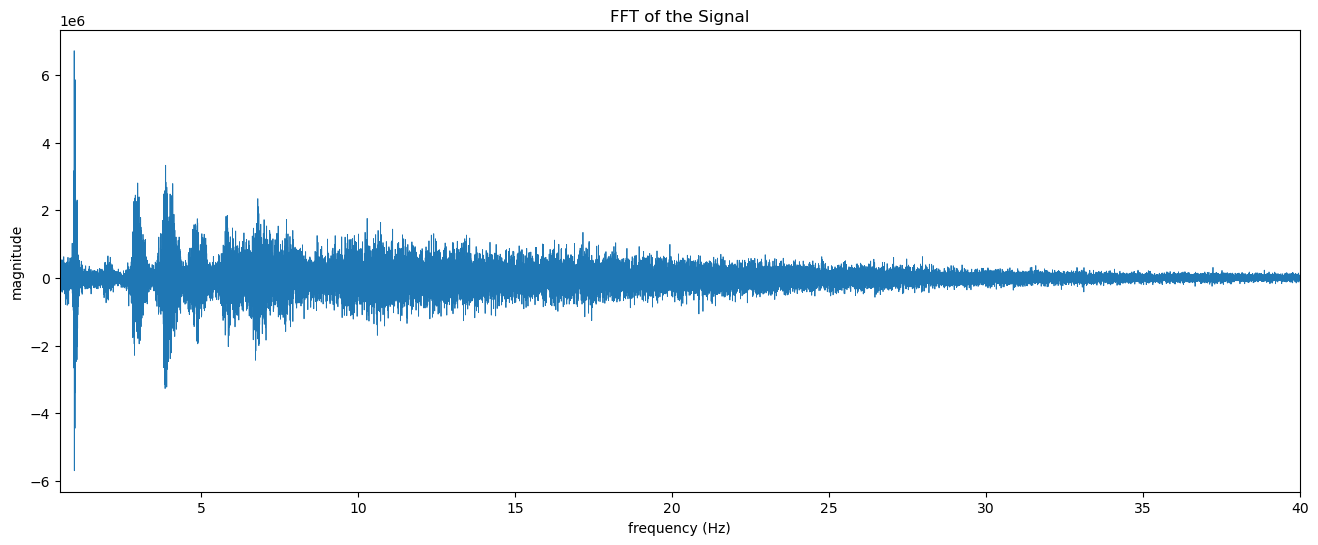

In [122]:
freq_cutoff = []
magnitude_cutoff = []

lwr = .5
upr = 40

for f, m in zip(freq, magnitude):
    if lwr < f < upr:
        freq_cutoff.append(f)
        magnitude_cutoff.append(m)

plt.figure(figsize=(16, 6))
plt.plot(freq_cutoff, magnitude_cutoff, linewidth=.6)
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude')
plt.title('FFT of the Signal')
plt.xlim(left=lwr, right=upr)
plt.show()

# Band Pass Filter Design
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to 0.5Hz and 40Hz.


* Design another butterworth band pass filter but this time use an order of 2 with cutoff frequencies equal to 0.5Hz and 40Hz


* Plot the frequency response of both filters and explain your observations


    * Hint use the following three functions scipy.signal.butter() and scipy.signal.freqz()


* Important to use the scipy.signal.freqz() function and NOT the scipy.signal.freqs() function. 

        scipy.signal.freqz() is for digital filters which is what we want.

https://docs.scipy.org/doc/scipy/reference/signal.html#filtering link to info about scipy.signal functions

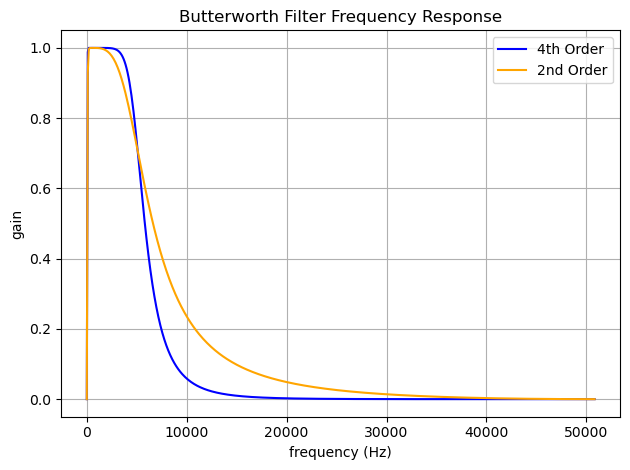

In [68]:
butter_4 = sp.signal.butter(4, [lwr, upr], btype='bandpass', analog=False, fs=hz)
butter_2 = sp.signal.butter(2, [lwr, upr], btype='bandpass', analog=False, fs=hz)

w_4, h_4 = sp.signal.freqz(butter_4[0], butter_4[1], fs=hz)
w_2, h_2 = sp.signal.freqz(butter_2[0], butter_2[1], fs=hz)

w_4_hz = ((hz / 2) / np.pi) * w_4
w_2_hz = ((hz / 2) / np.pi) * w_2

plt.plot(w_4_hz, np.abs(h_4), label='4th Order', color='blue')
plt.plot(w_2_hz, np.abs(h_2), label='2nd Order', color='orange')

plt.title('Butterworth Filter Frequency Response')
plt.xlabel('frequency (Hz)')
plt.ylabel('gain')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Observations:
    The above plot shows that the 4 order filter has a much steeper trend at the cutoff frequency of 0.5 Hz and 40 Hz which means that it has a better mechanism of blocking the frequencies that lie outside the passband. The 2 order filter has a slight slope, meaning that it allows more unwanted frequencies to pass through it. While both filters maintain a flat response within the passband, the 4 order filter provides sharper frequency isolation, making it more effective at isolating the desired signal. On the other hand, the 2 order filter can be preferable in scenarios where computational efficiency is prioritized.

# Apply filter to ECG_Sig
* Use the designed 4th order filter to filter ECG_sig and plot the first 5000 samples from the original signal (raw_signal) and the filtered signal.
* What happens after filtering?
* Explain your observations

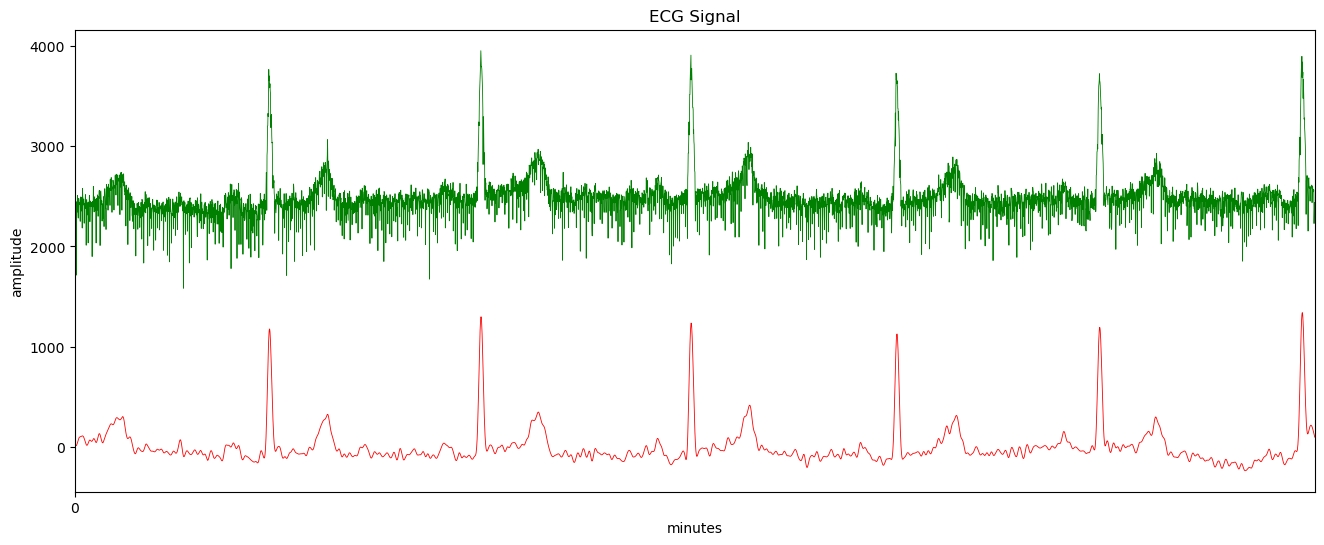

In [86]:
#code
ECG_sig_sample = ECG_sig[:5000]
ECG_sig_sample_filtered = sp.signal.filtfilt(butter_4[0], butter_4[1], ECG_sig_sample)

start = 0
hz = 800
stop = len(ECG_sig_sample) / hz / 60
time = np.linspace(0, stop, len(ECG_sig_sample))

plt.figure(figsize=(16, 6))

plt.plot(time, ECG_sig_sample, linewidth=.6, color='green')
plt.plot(time, ECG_sig_sample_filtered, linewidth=.6, color='red')

plt.title("ECG Signal")
plt.xlabel("minutes")
plt.ylabel("amplitude")
plt.xticks(np.arange(0, stop + 1, step=1))
plt.xlim(left=start, right=stop)
plt.show()

## Observations:
    After applying the 4 order filter to the signal, the filtered signal (in red) shows a much clean waveform compared to the original signal (in green). The filter effectively removes high and low frequency noise. As a result of that the key features of the ECG waveform, such as the P-wave, QRS complex, and T-wave, are more visible and easier to analyze. Meanwhile on the other hand, the original signal contain additional artifacts or unwanted components resulting in making these important features less visible and difficult to analyse.

# Plot the frequency domain of raw and filtered signal
* Plot raw and filtered signals in the frequency domain and explain your observations
* For each signal select frequencies from 0 to 50Hz

(-1.0, 100.0)

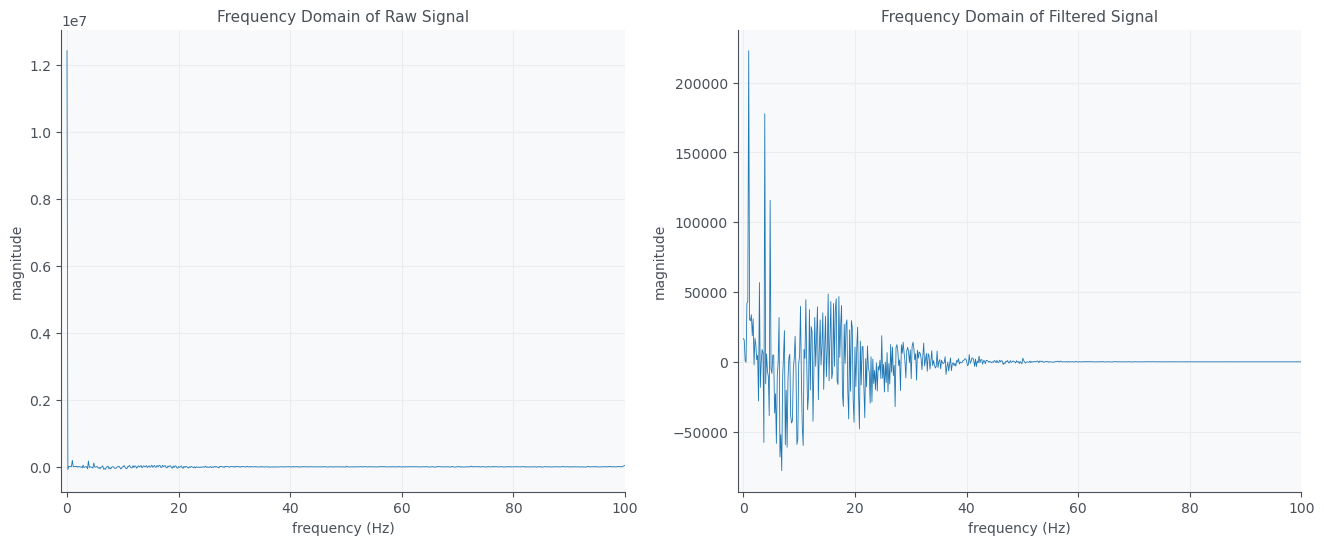

In [152]:
raw_fft = np.fft.rfft(ECG_sig_sample)
filtered_fft = np.fft.rfft(ECG_sig_sample_filtered)

freq = sp.fft.rfftfreq(len(ECG_sig_sample), 1/hz)

plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.plot(freq, raw_fft, linewidth=.6)
plt.title('Frequency Domain of Raw Signal')
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude')
plt.xlim(-1,100)

plt.subplot(1,2,2)
plt.plot(freq, filtered_fft, linewidth=.6)
plt.title('Frequency Domain of Filtered Signal')
plt.xlabel('frequency (Hz)')
plt.ylabel('magnitude')
plt.xlim(-1,100)

## Observations:
    The frequency domain of raw ECG signal displays the signal with unwanted high and low frequency noise. It also includes the additional frequencies that are outside the typical ECG range of 0.5 to 40 Hz, which as a result cause distortion in the signal. After applying a 4 order band-pass filter, the frequency range of the filtered signal appears much cleaner and more focused. The filter successfully removes the noise, allowing the main ECG frequencies i.e. 0.5 to 40 Hz to stand out. This produces a clearer ECG signal with reduced interference, making it easier to accurately analyze heart rate and rhythm.

# QRS Detection 
*  QRS detection using “hamilton” method provided by the “biosppy” package.
*  If you do not have this package installed, use the following command to install it  !pip install biosppy in the next cell
* For google colab use following command in the cell as well: !pip install biosppy


In [136]:
#still need to locally install biosppy
#code
# !pip install biosppy
import biosppy
from biosppy.signals import ecg

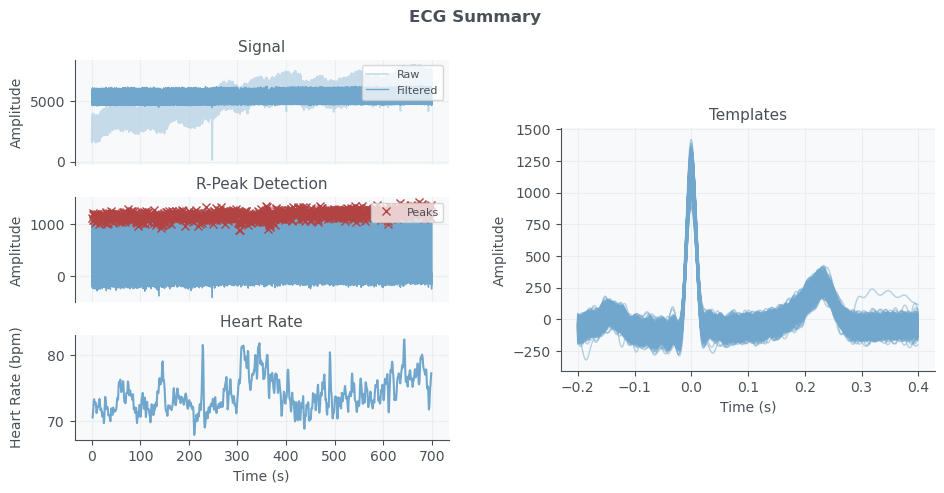

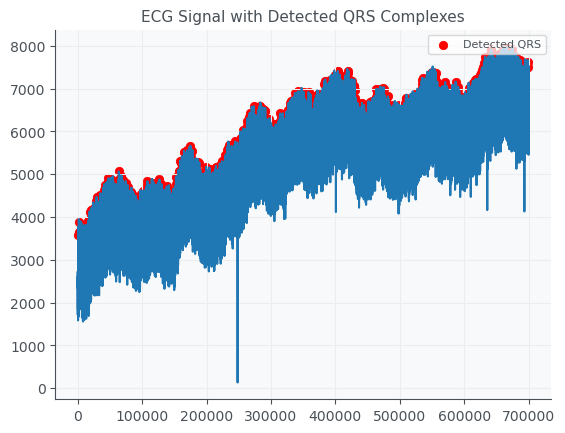

In [174]:
ecg_data_arr = biosppy.signals.ecg.ecg(signal=ECG_sig, show=True)

r_peaks = ecg_data_arr[2]

plt.plot(ECG_sig)
plt.scatter(r_peaks, ECG_sig[r_peaks], color='red', linewidth = .6, label='Detected QRS')
plt.title("ECG Signal with Detected QRS Complexes")
plt.legend()
plt.show()

## Observations:
   The above code block accurately detects and highlights QRS complexes in the ECG signal. It produces multiple informative plots such as the ECG signal with detected R-peaks, a heart rate plot, and an ECG template plot. In the primary ECG signal plot, red dots mark the detected R-peaks, aligning with the sharp spikes in the waveform to indicate correct QRS complex detection, mandatory for analyzing the heart's electrical activity. The heart rate plot shows the values calculated from intervals between R-peaks, providing insight into heart rate variability and overall rhythm. The template plot displays an averaged ECG waveform pattern which is calculated from sections around each QRS complex. It helps in recognizing consistent waveform features.